In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load cleaned dataset
df = pd.read_csv("cleaned_data.csv")

In [4]:
# Summary statistics
print(df.describe())

       start_station_id  end_station_id      start_lat      start_lng  \
count     436529.000000   433210.000000  515167.000000  515167.000000   
mean       31381.581588    31383.072944      38.905279     -77.032206   
std          289.457924      289.636810       0.028724       0.037154   
min        30200.000000    30200.000000      38.750000     -77.390000   
25%        31209.000000    31212.000000      38.892221     -77.044597   
50%        31288.000000    31288.000000      38.905030     -77.030000   
75%        31610.000000    31612.000000      38.918124     -77.011616   
max        33200.000000    33200.000000      39.130000     -76.825535   

             end_lat        end_lng  trip_duration  
count  514758.000000  514758.000000  515167.000000  
mean       38.904452     -77.031959      17.345674  
std         0.028628       0.037061      53.264197  
min        38.700000     -77.490000       0.016667  
25%        38.890612     -77.044600       5.783333  
50%        38.903658    

In [5]:
# Count members vs. casual riders
print(df['member_casual'].value_counts())

member_casual
member    336099
casual    179068
Name: count, dtype: int64


In [6]:
# Trip duration comparison
df.groupby('member_casual')['trip_duration'].describe()


,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,179068.0,25.749894,75.367302,0.016667,7.683333,13.333333,24.716667,1500.25
member,336099.0,12.868044,35.561502,0.016667,5.083333,8.883333,14.916667,1499.95


In [7]:
df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
0,028CB30D63626320,classic_bike,2024-05-23 16:07:47,2024-05-23 16:20:22,Grant Circle,31421.0,10th & Quincy St NE / Turkey Thicket Rec,31541.0,38.942025,-77.018221,38.937849,-76.993509,casual,12.583333
1,33D6F7F8951D5D67,electric_bike,2024-05-24 09:19:05,2024-05-24 10:02:29,W Columbia St & N Washington St,32609.0,S Glebe Rd & Potomac Ave,31010.0,38.885602,-77.166884,38.842600,-77.050200,casual,43.400000
2,BDDEFEBB8770EFF2,classic_bike,2024-05-09 08:54:14,2024-05-09 08:59:16,1st & L St NW,31677.0,New Jersey Ave & F St NW,31655.0,38.903819,-77.011987,38.897108,-77.011616,member,5.033333
3,31C46CFE02542EF5,classic_bike,2024-05-16 13:48:38,2024-05-16 14:04:43,North Capitol & R St NE,31527.0,10th & Quincy St NE / Turkey Thicket Rec,31541.0,38.912560,-77.008775,38.937849,-76.993509,member,16.083333
4,3DB767AB9DF69BD7,electric_bike,2024-05-22 08:27:00,2024-05-22 08:38:24,Eastern Market / 7th & North Carolina Ave SE,31610.0,New Jersey Ave & F St NW,31655.0,38.887016,-76.996802,38.897108,-77.011616,member,11.400000
5,F2452ED7A2CB17F7,classic_bike,2024-05-21 22:49:10,2024-05-21 22:51:31,1st & Rhode Island Ave NW,31506.0,Florida Ave & R St NW,31503.0,38.915417,-77.012289,38.912600,-77.013500,member,2.350000
6,2FE99ACF2668FCB7,classic_bike,2024-05-07 09:17:55,2024-05-07 09:27:23,7th St & Massachusetts Ave NE,31647.0,New Jersey Ave & F St NW,31655.0,38.892220,-76.996020,38.897108,-77.011616,member,9.466667
7,092944F86E571ECF,electric_bike,2024-05-08 17:30:27,2024-05-08 17:34:31,1st & L St NW,31677.0,Florida Ave & R St NW,31503.0,38.903820,-77.011806,38.912600,-77.013500,member,4.066667
8,C7C3C7E07E1B1105,classic_bike,2024-05-23 19:27:39,2024-05-23 19:28:11,10th & Quincy St NE / Turkey Thicket Rec,31541.0,10th & Quincy St NE / Turkey Thicket Rec,31541.0,38.937849,-76.993509,38.937849,-76.993509,member,0.533333
9,C1846DD28F88575E,classic_bike,2024-05-06 07:22:09,2024-05-06 07:52:39,MLK & Marion Barry Ave SE,31802.0,Anacostia Ave & Benning Rd NE / River Terrace,31708.0,38.867373,-76.988039,38.896544,-76.960120,member,30.500000


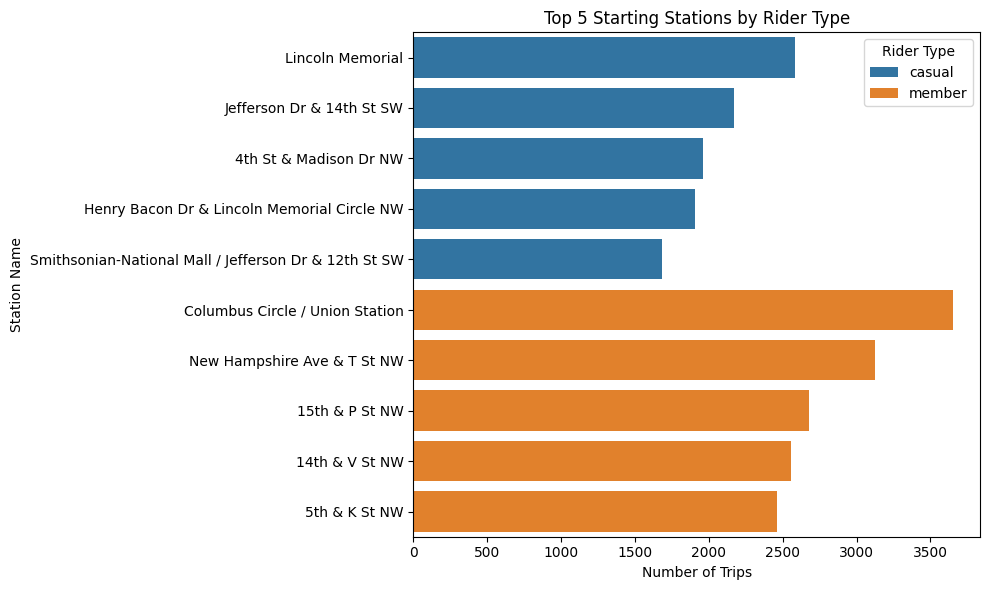

In [11]:
top_stations = (
    df.groupby(['member_casual', 'start_station_name'])
    .size()
    .reset_index(name='trip_count')
)

top_stations = (
    top_stations.sort_values(['member_casual', 'trip_count'], ascending=[True, False])
    .groupby('member_casual')
    .head(5)
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_stations,
    x='trip_count',
    y='start_station_name',
    hue='member_casual'
)
plt.title("Top 5 Starting Stations by Rider Type")
plt.xlabel("Number of Trips")
plt.ylabel("Station Name")
plt.legend(title="Rider Type")
plt.tight_layout()
plt.show()